In [1]:
import numpy as np
import pandas as pd

In [2]:
rankings = pd.read_csv("../data/preprocessed/rankings.csv")
rankings.head()

,standingsdate,index,team_id,season_id,standingsdate.1,conference,team,g,w,l,w_pct,home_record,road_record,rank
0,2003-10-01,84388,1610612742,22002,2003-10-01,West,Dallas,82,60,22,0.732,33-8,27-14,1
1,2003-10-01,84389,1610612759,22002,2003-10-01,West,San Antonio,82,60,22,0.732,33-8,27-14,2
2,2003-10-01,84390,1610612758,22002,2003-10-01,West,Sacramento,82,59,23,0.720,35-6,24-17,3
3,2003-10-01,84391,1610612750,22002,2003-10-01,West,Minnesota,82,51,31,0.622,33-8,18-23,4
4,2003-10-01,84393,1610612757,22002,2003-10-01,West,Portland,82,50,32,0.610,27-14,23-18,5


In [67]:
rankings.season_id.value_counts()

22010    12480
22019    12240
22018    10470
22017    10380
22004    10260
22007    10230
22009    10230
22012    10200
22015    10200
22016    10200
22013    10200
22006    10200
22014    10170
22003    10150
22008    10140
22005    10140
22020     8573
22011     8550
22021     4350
12019      900
12009      780
12006      780
12015      750
12012      750
12014      720
12013      720
12016      720
12007      720
12010      690
12008      690
12003      667
12005      660
12004      630
12018      540
12017      510
12021      480
12020      336
12011      270
22002      116
Name: season_id, dtype: int64

In [3]:
df = rankings[["standingsdate", "team_id", "conference", "rank", "season_id"]]
df["year"] = rankings["standingsdate"].apply(lambda date: date[:4])
df.head()


<ipython-input-3-438d3ab29566>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = rankings["standingsdate"].apply(lambda date: date[:4])


,standingsdate,team_id,conference,rank,season_id,year
0,2003-10-01,1610612742,West,1,22002,2003
1,2003-10-01,1610612759,West,2,22002,2003
2,2003-10-01,1610612758,West,3,22002,2003
3,2003-10-01,1610612750,West,4,22002,2003
4,2003-10-01,1610612757,West,5,22002,2003


<ipython-input-7-17690886a237>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["standingsdate"])


<AxesSubplot:>

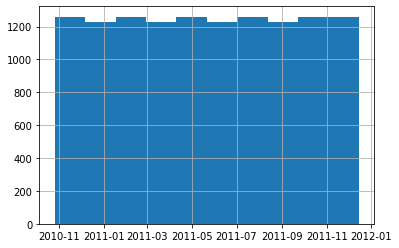

In [7]:
df["date"] = pd.to_datetime(df["standingsdate"])
df.query("season_id == 22010")["date"].hist()

In [15]:
matches = pd.read_csv("../data/preprocessed/games.csv")

matches.head()

,Unnamed: 0,game_id,home_team_id,visitor_team_id,season,pts_home,fg_pct_home,ft_pct_home,fg3_pct_home,ast_home,...,pts_away,fg_pct_away,ft_pct_away,fg3_pct_away,ast_away,reb_away,home_team_wins,date,SEASON,winner_id
0,0,22101005,1610612748,1610612750,2021,104.0,0.398,0.760,0.333,23.0,...,113.0,0.422,0.875,0.357,21.0,46.0,0,2022-03-12,2021-01-01,1610612750
1,1,22101006,1610612741,1610612739,2021,101.0,0.443,0.933,0.429,20.0,...,91.0,0.419,0.824,0.208,19.0,40.0,1,2022-03-12,2021-01-01,1610612741
2,2,22101007,1610612759,1610612754,2021,108.0,0.412,0.813,0.324,28.0,...,119.0,0.489,1.000,0.389,23.0,47.0,0,2022-03-12,2021-01-01,1610612754
3,3,22101008,1610612744,1610612749,2021,122.0,0.484,0.933,0.400,33.0,...,109.0,0.413,0.696,0.386,27.0,39.0,1,2022-03-12,2021-01-01,1610612744
4,4,22101009,1610612743,1610612761,2021,115.0,0.551,0.750,0.407,32.0,...,127.0,0.471,0.760,0.387,28.0,50.0,0,2022-03-12,2021-01-01,1610612761


In [16]:
matches["season"].unique()

array([2021, 2020, 2019, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006,
       2005, 2004, 2003, 2018, 2017, 2016, 2015, 2014])

<AxesSubplot:>

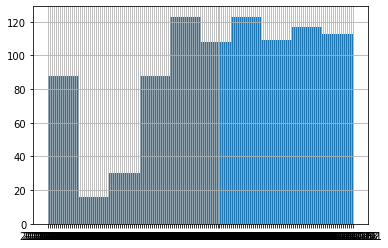

In [14]:
matches[matches["date"].apply(lambda d : d[:4]) == "2011"]["date"].hist()

In [68]:
df.query(" standingsdate == '2003-10-01'")

conference  rank  year
season_id standingsdate team_id                          
22002     2003-10-01    1610612742       West     1  2003
                        1610612759       West     2  2003
                        1610612758       West     3  2003
                        1610612750       West     4  2003
                        1610612757       West     5  2003
                        1610612765       East     6  2003
                        1610612747       West     7  2003
                        1610612751       East     8  2003
                        1610612755       East     9  2003
                        1610612754       East    10  2003
                        1610612740       East    11  2003
                        1610612762       West    12  2003
                        1610612756       West    13  2003
                        1610612738       East    14  2003
                        1610612745       West    15  2003
                        1610612749       East    16  2003
                        1610612753       East    17  2003
                        1610612760       West    18  2003
                        1610612744       West    19  2003
                        1610612752       East    20  2003
                        1610612764       East    21  2003
                        1610612737       East    22  2003
                        1610612741       East    23  2003
                        1610612763       West    24  2003
                        1610612746       West    25  2003
                        1610612748       East    26  2003
                        1610612761       East    27  2003
                        1610612743       West    28  2003
                        1610612739       East    29  2003

In [64]:
df = df.set_index(["season_id", "standingsdate", "team_id"])

KeyError: "None of ['season_id', 'standingsdate', 'team_id'] are in the columns"

In [62]:
for (n,g) in df.reset_index().groupby(["team_id", "season_id"]):
    print(g)
    break

     season_id standingsdate     team_id conference  rank  year
130      12003    2003-10-05  1610612737       East    15  2003
159      12003    2003-10-06  1610612737       East    15  2003
188      12003    2003-10-07  1610612737       East    15  2003
217      12003    2003-10-08  1610612737       East    15  2003
246      12003    2003-10-09  1610612737       East    15  2003
275      12003    2003-10-10  1610612737       East    15  2003
304      12003    2003-10-11  1610612737       East    15  2003
333      12003    2003-10-12  1610612737       East    15  2003
362      12003    2003-10-13  1610612737       East    15  2003
391      12003    2003-10-14  1610612737       East    15  2003
420      12003    2003-10-15  1610612737       East    15  2003
449      12003    2003-10-16  1610612737       East    15  2003
478      12003    2003-10-17  1610612737       East    15  2003
507      12003    2003-10-18  1610612737       East    15  2003
536      12003    2003-10-19  1610612737

In [69]:
future_df = pd.DataFrame()
for (n,g) in df.reset_index().groupby(["team_id", "season_id"]):
    a = g.iloc[:-1].copy()
    a["next_rank"] = g["rank"][1:].values
    a["next_standing"] = g["standingsdate"][1:].values
    future_df = future_df.append(a)

future_df

<ipython-input-69-6c10a8c33d10>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df = future_df.append(a)
<ipython-input-69-6c10a8c33d10>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df = future_df.append(a)
<ipython-input-69-6c10a8c33d10>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df = future_df.append(a)
<ipython-input-69-6c10a8c33d10>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df = future_df.append(a)
<ipython-input-69-6c10a8c33d10>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df = future_df.

,season_id,standingsdate,team_id,conference,rank,year,next_rank,next_standing
130,12003,2003-10-05,1610612737,East,15,2003,15,2003-10-06
159,12003,2003-10-06,1610612737,East,15,2003,15,2003-10-07
188,12003,2003-10-07,1610612737,East,15,2003,15,2003-10-08
217,12003,2003-10-08,1610612737,East,15,2003,15,2003-10-09
246,12003,2003-10-09,1610612737,East,15,2003,15,2003-10-10
...,...,...,...,...,...,...,...,...
201627,22021,2022-03-07,1610612766,East,16,2022,17,2022-03-08
201658,22021,2022-03-08,1610612766,East,17,2022,17,2022-03-09
201688,22021,2022-03-09,1610612766,East,17,2022,17,2022-03-10
201718,22021,2022-03-10,1610612766,East,17,2022,17,2022-03-11


In [36]:
len(df)

201792

In [70]:
future_df.to_csv("../data_web/rankings.csv")

In [44]:
(future_df == "NaN").sum()

standingsdate    0
team_id          0
conference       0
rank             0
year             0
next_rank        0
next_standing    0
dtype: int64

In [50]:
future_df["rank"].unique()

array([22, 15, 17, 21, 18, 27, 26, 24, 25, 23, 28, 29, 16, 30, 14,  7, 12,
       11, 20,  6, 19,  4, 13,  9, 10,  5,  8,  1,  2,  3, 31, 32, 34, 36,
       38, 33, 35, 37])

In [52]:
future_df["next_rank"].unique()

array([22, 15, 17, 21, 18, 27, 26, 24, 25, 23, 28, 29, 16, 30, 14,  7, 12,
       11, 20,  6, 19,  4, 13,  9, 10,  5,  8,  1,  2,  3, 31, 32, 34, 36,
       38, 33, 35, 37])

In [54]:
future_df.isna().sum()

standingsdate    0
team_id          0
conference       0
rank             0
year             0
next_rank        0
next_standing    0
dtype: int64

In [56]:
future_df.query("year == '2003'")["standingsdate"].unique()
future_df.query("year == '2003'")["next_standing"].unique()

array(['2003-10-02', '2003-10-03', '2003-10-04', '2003-10-05',
       '2003-10-06', '2003-10-07', '2003-10-08', '2003-10-09',
       '2003-10-10', '2003-10-11', '2003-10-12', '2003-10-13',
       '2003-10-14', '2003-10-15', '2003-10-16', '2003-10-17',
       '2003-10-18', '2003-10-19', '2003-10-20', '2003-10-21',
       '2003-10-22', '2003-10-23', '2003-10-24', '2003-10-25',
       '2003-10-26', '2003-10-27', '2003-10-28', '2003-10-29',
       '2003-10-30', '2003-10-31', '2003-11-01', '2003-11-02',
       '2003-11-03', '2003-11-04', '2003-11-05', '2003-11-06',
       '2003-11-07', '2003-11-08', '2003-11-09', '2003-11-10',
       '2003-11-11', '2003-11-12', '2003-11-13', '2003-11-14',
       '2003-11-15', '2003-11-16', '2003-11-17', '2003-11-18',
       '2003-11-19', '2003-11-20', '2003-11-21', '2003-11-22',
       '2003-11-23', '2003-11-24', '2003-11-25', '2003-11-26',
       '2003-11-27', '2003-11-28', '2003-11-29', '2003-11-30',
       '2003-12-01', '2003-12-02', '2003-12-03', '2003-